## Data Analysis of the HIV dataset

In [12]:
import os
import pandas as pd

# Get the path to the current notebook's directory
notebook_dir = os.getcwd()
csv_path = os.path.join(notebook_dir, '..', 'data', 'raw', 'HIV.csv')  # Move one level up

df = pd.read_csv(csv_path)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41127 entries, 0 to 41126
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   smiles      41127 non-null  object
 1   activity    41127 non-null  object
 2   HIV_active  41127 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 964.0+ KB


In [17]:
# First five rows

df.head()

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0


In [19]:
# Summary statistics
print(df.describe())

         HIV_active
count  41127.000000
mean       0.035086
std        0.184001
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


In [20]:
# Check for missing values
print(df.isnull().sum())

smiles        0
activity      0
HIV_active    0
dtype: int64


In [22]:
print(df.columns)

Index(['smiles', 'activity', 'HIV_active'], dtype='object')


In [27]:
print(df['HIV_active'].value_counts())

HIV_active
0    39684
1     1443
Name: count, dtype: int64


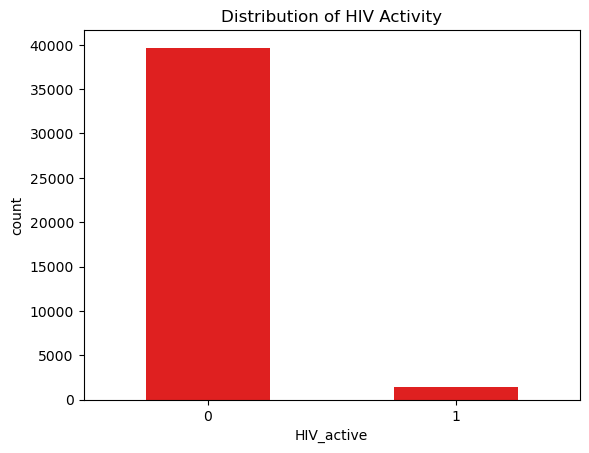

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data= df, x= 'HIV_active', color='red', width= 0.5)
plt.title("Distribution of HIV Activity")
plt.show()

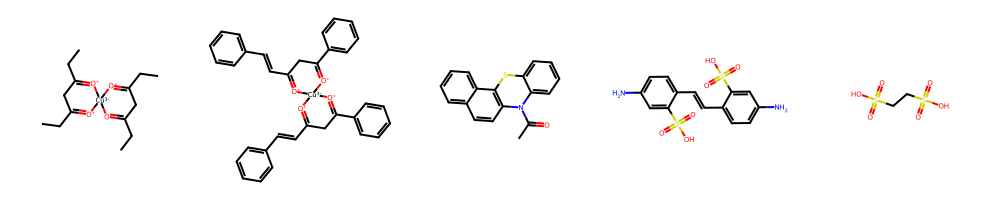

In [36]:
from rdkit import Chem
from rdkit.Chem import Draw

# Convert first 5 SMILES to molecule objects
mols = [Chem.MolFromSmiles(smile) for smile in df['smiles'].head()]
Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200,200))
